In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['mnist.npz']


# MNIST - TensorFlow Basics

The objective of this notebook is to build a basic model for MNIST dataset using TensorFlow. This code is from [pythonprogramming.net](https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/)

In [2]:
import tensorflow as tf

tf.__version__

'1.12.0'

## MNIST Data
Load MNIST dataset. MNIST data is a 28 x 28 images of hand-written digits from 0 to 9.

In [3]:
def load_data():
    with np.load("../input/mnist.npz") as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data()
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Plot Data
This is to show the shape of the sample set` x_train[0]`.

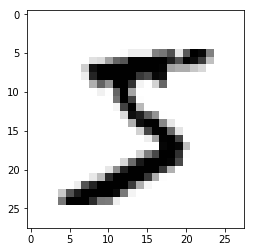

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show();

## Scale the Data
Normalizing the MNIST dataset

In [5]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Build the Model

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

## Model Parameters 

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [8]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.2628 - acc: 0.9226
Epoch 2/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.1077 - acc: 0.9671
Epoch 3/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0744 - acc: 0.9766
Epoch 4/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0562 - acc: 0.9822
Epoch 5/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0430 - acc: 0.9859
Epoch 6/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0341 - acc: 0.9888
Epoch 7/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0267 - acc: 0.9911
Epoch 8/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0214 - acc: 0.9931
Epoch 9/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0179 - acc: 0.9937
Epoch 10/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0168 - acc: 0.9

## Model Evaluation 

In [9]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

# Saving Model
# model.save('num_reader.model')

# Loading Model
# model = tf.keras.models.load_models('num_reader.model')

10000/10000 [==============================] - 0s 46us/step
0.10085738769807649 0.9757


## Model Predictions

2


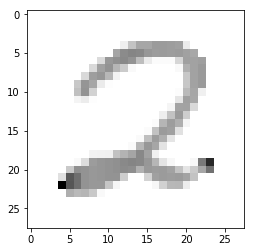

In [10]:
predictions = model.predict([x_test])

print(np.argmax(predictions[35]))
plt.imshow(x_test[35], cmap=plt.cm.binary)
plt.show();